# Part 1: Modeling Challenge

## Python Coding and Data Set

In [1]:
# Import the modules
import pandas as pd
import numpy as np
import numpy.random as npr
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

%matplotlib inline

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read the csv file directly from git
url = ('https://gist.githubusercontent.com/jeff-boykin/'
       'b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c'
       '792af49c9b78f20c35d5cd729e1307a7df7/breast-cancer.csv'
      )
df1 = pd.read_csv(url, index_col=None, header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Or from your local folder
df = pd.read_csv('../Data/breast-cancer.csv', index_col=None, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Read the txt file containing the headers
headers = pd.read_csv("../Data/field_names.txt", header=None)
headers.head()

,0
0,ID
1,diagnosis
2,radius_mean
3,radius_sd_error
4,radius_worst


In [5]:
# Check that columns and headers match sizes
print('There are {:d} columns in the DataFrame'.format(df.shape[1]))
print('There are {:d} headers'.format(headers.shape[0]))

There are 32 columns in the DataFrame
There are 32 headers


In [6]:
# Define a function to add the headers to the dataframe
def add_headers_from_txt(df, headers):
    # df -> DataFrame w/o headers
    # headers -> DataFrame with only headers
    if df.shape[1] == headers.shape[1]:
        df.columns = headers.iloc[0]
    elif df.shape[1] == headers.shape[0]:
        df.columns = headers.transpose().iloc[0]
    else:
        print('Dimensions do not match!')
    return 

add_headers_from_txt(df, headers)
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Check data types
df.dtypes

0
ID                              int64
diagnosis                      object
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error       float64
concave_points_worst          float64
symmetry_m

In [16]:
# summary statistics of the dataframe
df.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,diagnosis_encoded
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


All entries are float numbers... but the diagnosis (that is the target value y)! We will encode its values to be equal to {0, 1}.

In [8]:
# check for nulls/NaNs
df.isnull().sum()

0
ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fracta

Apparently no Nulls/NaNs :)

In [9]:
print(df.loc[df['diagnosis'] == 'B'].shape)
print(df.loc[df['diagnosis'] == 'M'].shape)
print(df.shape)

(357, 32)
(212, 32)
(569, 32)


Out of 569 entries there are 357 benign (B) and 212 malignant (M).
Dataset is indeed pretty much balanced.

In [12]:
## Encoding categorical data 

# Create a label encoder object
labelencoder = LabelEncoder()

# Fit and apply the encoder to the column of the dataframe
# and add a new column with the encoded values.
df["diagnosis_encoded"] = labelencoder.fit_transform(df['diagnosis'] )

# You could also convert back into categories
list(labelencoder.inverse_transform([0, 1]))

['B', 'M']

We are going to scale data since Support Vector Classifier (SVC) is influenced by the scale of the input features.

DT on the other hand, doesn't really require any scaling... but since we'd like to compare performances with SVC, it makes sense to train and test the models ont the same data!

In [14]:
# scale the data in order to have mean = 0 and variance = 1
# Careful: scaling should theoretically be done on the training set only... since, by definition,
# the test set is still unknown when models are built and trained!
# That would be the theory! In practice, due to time constraint and to make things simpler, 
# I am actually scaling the whole dataset ;)
ss = StandardScaler()
# create a new dataframe (we'll delete it) without the first 2 columns
df_ = df.iloc[:,2:-1]
# and scale/transform it
df_c = ss.fit_transform(df_)


# trasform it back into a DataFrame
df_c_df = pd.DataFrame(df_c, index=df_.index, columns=df_.columns)
df_c_df.head()

# add back the column with the encoded values
df_c_df[['diagnosis_encoded']] = df[['diagnosis_encoded']]

# save the scaled DataFrame as a csv file (so it can be reloaded at any time)
export_csv = df_c_df.to_csv('scaled_data.csv', 
                            index = None,
                            header=True)

# Delete useless dataframes to release memory
del df_, df_c

### Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this

Note: this question ain't really clear to me... 

In [10]:
# Smoothness
s_mean1 = df.loc[df['diagnosis'] == 'B']['smoothness_mean'].mean()
s_mean2 = df.loc[df['diagnosis'] == 'M']['smoothness_mean'].mean()
s_median1 = df.loc[df['diagnosis'] == 'B']['smoothness_mean'].median()
s_median2 = df.loc[df['diagnosis'] == 'M']['smoothness_mean'].median()
print('\nBenign cancer: smoothness mean is {:f} and median is {:f}'.format(s_mean1, s_median1))
print('Malignant cancer: smoothness mean is {:f} and median is {:f}\n'.format(s_mean2, s_median2))

# Compactness
c_mean1 = df.loc[df['diagnosis'] == 'B']['compactness_mean'].mean()
c_mean2 = df.loc[df['diagnosis'] == 'M']['compactness_mean'].mean()
c_median1 = df.loc[df['diagnosis'] == 'B']['compactness_mean'].median()
c_median2 = df.loc[df['diagnosis'] == 'M']['compactness_mean'].median()
print('Benign cancer: compactness mean is {:f} and median is {:f}'.format(c_mean1, c_median1))
print('Malignant cancer: compactness mean is {:f} and median is {:f}'.format(c_mean2, c_median2))


Benign cancer: smoothness mean is 2.000321 and median is 1.851000
Malignant cancer: smoothness mean is 4.323929 and median is 3.679500

Benign cancer: compactness mean is 0.021438 and median is 0.016310
Malignant cancer: compactness mean is 0.032281 and median is 0.028590


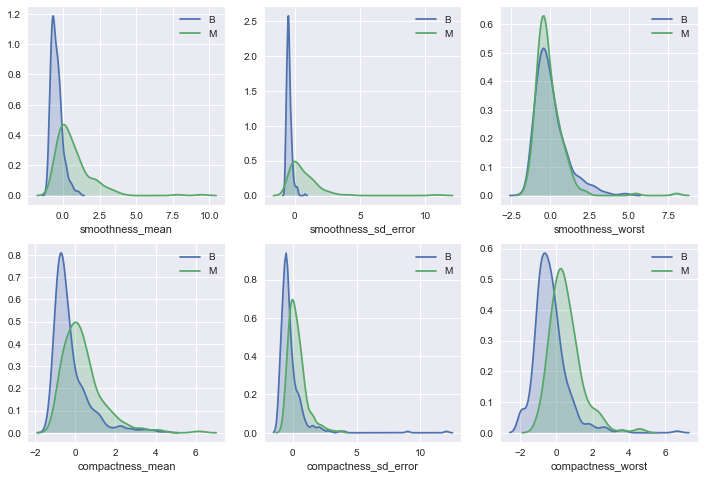

In [22]:
df_B = df_c_df.loc[df_c_df['diagnosis_encoded'] == 0]
df_M = df_c_df.loc[df_c_df['diagnosis_encoded'] == 1]

# number of subplot rows 
sp_r = 2
# number of subplot cols 
sp_c = 3
fig, axs = plt.subplots(sp_r, sp_c, figsize=(12, 8))

c = 12
for i in range(sp_r):
    for j in range(sp_c):
        ax = sns.distplot(df_B.iloc[:,c], 
                     hist=False,
                     kde_kws=dict(shade=True), 
                     label='B',
                     ax=axs[i, j])
        ax = sns.distplot(df_M.iloc[:,c], 
                     hist=False,
                     kde_kws=dict(shade=True),
                     label='M',
                     ax=axs[i, j])
        #axs[i, j].set_title(df_B.iloc[:,c].name)
        c = c + 1

Looking at the distribution plots we can also easily visualize mean and median... if the distribution is simmetric median and mean are matching.

    1. Mean and median for benign and malignant cases are matching only for 'smoothness_worst'.
    2. For all the other features we can see that 'malignant distributions' are slightly shifted compared to bening ones, meaning that median and mean are always different between the two cases.

## Write a function to generate bootstrap samples of the data.

In [23]:
# If scikit-learn resample function can be used!!! EASY :)
df_ = resample(df, n_samples=20, random_state=0)

In [26]:
# Otherwise manual resample...
def generate_bootstrap_samples(df, replace=True, n_samples=len(df)):
    
    ix = np.random.choice(df.index, n_samples, replace=replace)
    df_resampled = pd.DataFrame(columns=df.columns)
    
    for i in ix:
        df_resampled = df_resampled.append(df.iloc[i], 
                                           ignore_index=True)
    return df_resampled

In [29]:
# Test if the resampling function works
dff = generate_bootstrap_samples(df, replace=True, n_samples=3)
dff

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,diagnosis_encoded
0,905189,B,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,...,19.58,115.90,947.9,0.1206,0.1722,0.2310,0.1129,0.2778,0.07012,0
1,9110720,B,11.99,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.04274,...,30.36,84.48,513.9,0.1311,0.1822,0.1609,0.1202,0.2599,0.08251,0
2,897604,B,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,...,16.91,87.38,576.0,0.1142,0.1975,0.1450,0.0585,0.2432,0.10090,0


# Exploratory Analysis

### Identify 2-3 variables that are predictive of a malignant tumor
We are going to use two approaches to identify those variables:

    1. Correlation matrix.
    2. Distribution plots (Benign VS Malignant) and compute the overlapping areas of the distributions.
    
In addition, we could have used PCA as well. PCA would indeed return us the linear combination of the feature retaining the highest amount of information. Looking at the loadings of the first 2-3 PCA components we might see that certain features appean consistently with higher values. If that's the case, we could define those features as the most significant ones.

#### Correlation Matrix and condition number

In [30]:
print('Condition number of the feature matrix is {:f}'.format(np.linalg.cond(df_c_df)))

Condition number of the feature matrix is 317.832381


Given that the condition number of the feature matrix is < 1000 (rule of thumb threshold) we can consider the features to be not too correlated. PCA and/or regularization are not really needed!!!

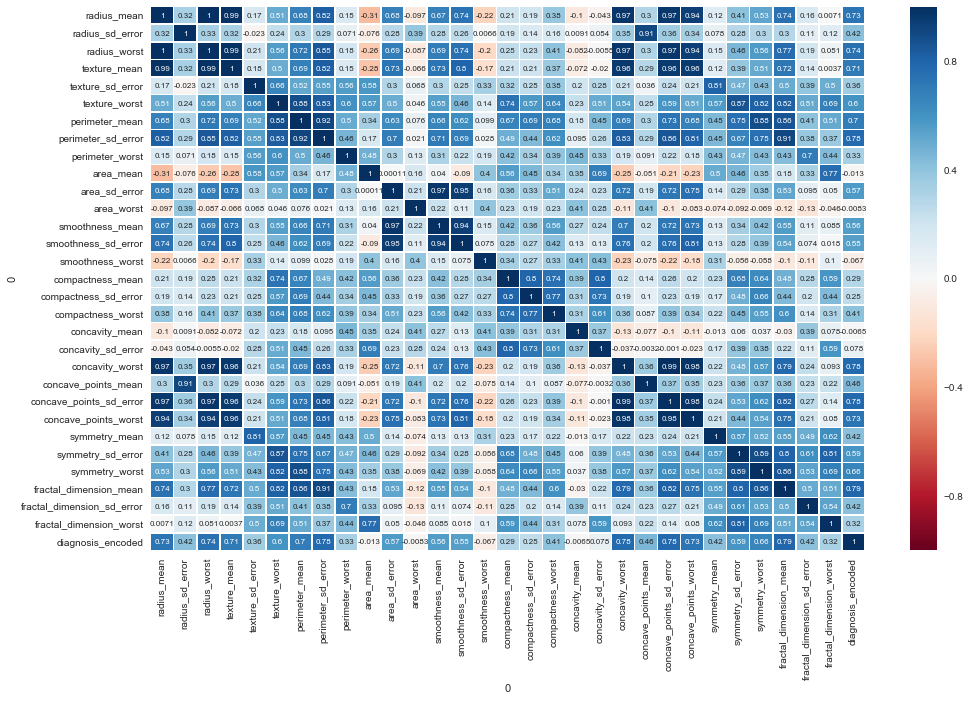

In [35]:
# Check correlation
plt.figure(figsize=(16, 10))
sns.heatmap(
    df_c_df.corr(),
    linewidths=0.5,
    cmap="RdBu",
    vmin=-1, vmax=1, 
    annot=True, annot_kws={"size": 8})

In [41]:
# Compute the correlation matrix and return the features correlating the most with the target variable
cor = df_c_df.corr()
cor['diagnosis_encoded'].nlargest(11)

0
diagnosis_encoded          1.000000
fractal_dimension_mean     0.793566
concave_points_sd_error    0.782914
perimeter_sd_error         0.776614
concavity_worst            0.776454
radius_worst               0.742636
concave_points_worst       0.733825
radius_mean                0.730029
texture_mean               0.708984
perimeter_mean             0.696360
symmetry_worst             0.659610
Name: diagnosis_encoded, dtype: float64

Observations: 
1. We could remove the highly correlated features since they might impact model performance and predictive power.
2. Features are in general positively correlated.

#### Distribution plots

[(27, 'fractal_dimension_mean', 0.13921825646794547),
 (7, 'perimeter_sd_error', 0.14632888773649558),
 (22, 'concave_points_sd_error', 0.15737713094906949),
 (6, 'perimeter_mean', 0.16200304167584928),
 (20, 'concavity_worst', 0.16437903028925055),
 (23, 'concave_points_worst', 0.17086601275693958),
 (26, 'symmetry_worst', 0.19033749603892147),
 (2, 'radius_worst', 0.20348675145245479),
 (13, 'smoothness_sd_error', 0.20553630523083222),
 (0, 'radius_mean', 0.21381727195493722)]

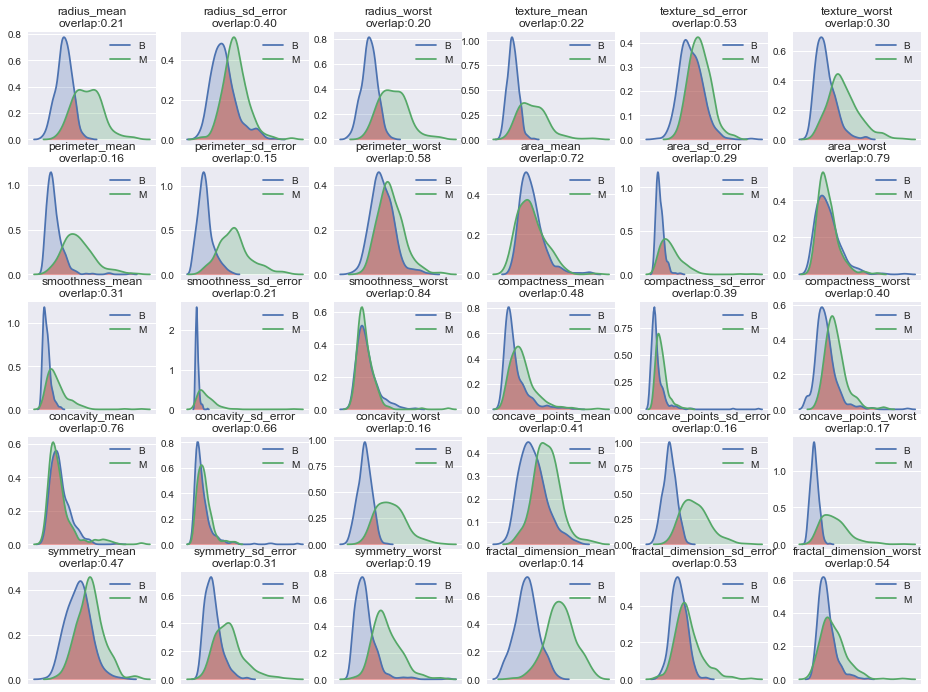

In [38]:
# number of subplot rows 
sp_r = 5
# number of subplot cols 
sp_c = 6
fig, axs = plt.subplots(sp_r, sp_c, figsize=(16, 12))

pct = []
c = 0
for i in range(sp_r):
    for j in range(sp_c):
        ax = sns.distplot(df_B.iloc[:,c], 
                     hist=False,
                     kde_kws=dict(shade=True), 
                     label='B',
                     ax=axs[i, j])
        ax = sns.distplot(df_M.iloc[:,c], 
                     hist=False,
                     kde_kws=dict(shade=True),
                     label='M',
                     ax=axs[i, j])
        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]
        l2 = ax.lines[1]

        # Get the xy data from the lines so that we can shade
        x1, y1 = l1.get_xydata().T
        x2, y2 = l2.get_xydata().T

        xmin = max(x1.min(), x2.min())
        xmax = min(x1.max(), x2.max())
        x = np.linspace(xmin, xmax, 100)
        y1 = np.interp(x, x1, y1)
        y2 = np.interp(x, x2, y2)
        y = np.minimum(y1, y2)
        pct_t = integrate.trapz(y) / (integrate.trapz(y1) + integrate.trapz(y2) - integrate.trapz(y))
        pct.append((c, df_B.iloc[:,c].name, pct_t))
        ax.fill_between(x, y, color="red", alpha=0.3)
        #axs[i, j].set_title('overlap:%.2f' % round(pct,2))
        axs[i, j].set_title(df_B.iloc[:,c].name + '\noverlap:%.2f' % round(pct_t,2))
        axs[i, j].get_xaxis().set_visible(False)
        axs[i, j].legend(loc='upper right')
        c = c + 1

# Sort the array by percentage value (3rd column)
pct.sort(key=lambda x: x[2])
# and print the 10 features with the lowest overlapping area
pct[:10]

The above kernel density estimates can be used as a starting point for our analysis. Splitting between malignant and bening cases in the univariate case (that is feature by feature) and estimating the respective kernel densities we could detect if there is a significant split between the diagnosis.
Basically the 2-3 features with the smallest density-overlap could be considered the ones with the highest predictive power.

#### Findings
Both methods return us the same 2-3 most predictive features:

    1. fractal_dimension_mean
    2. concave_points_sd_error
    3. perimeter_sd_error

Now we could also look at their pairplots

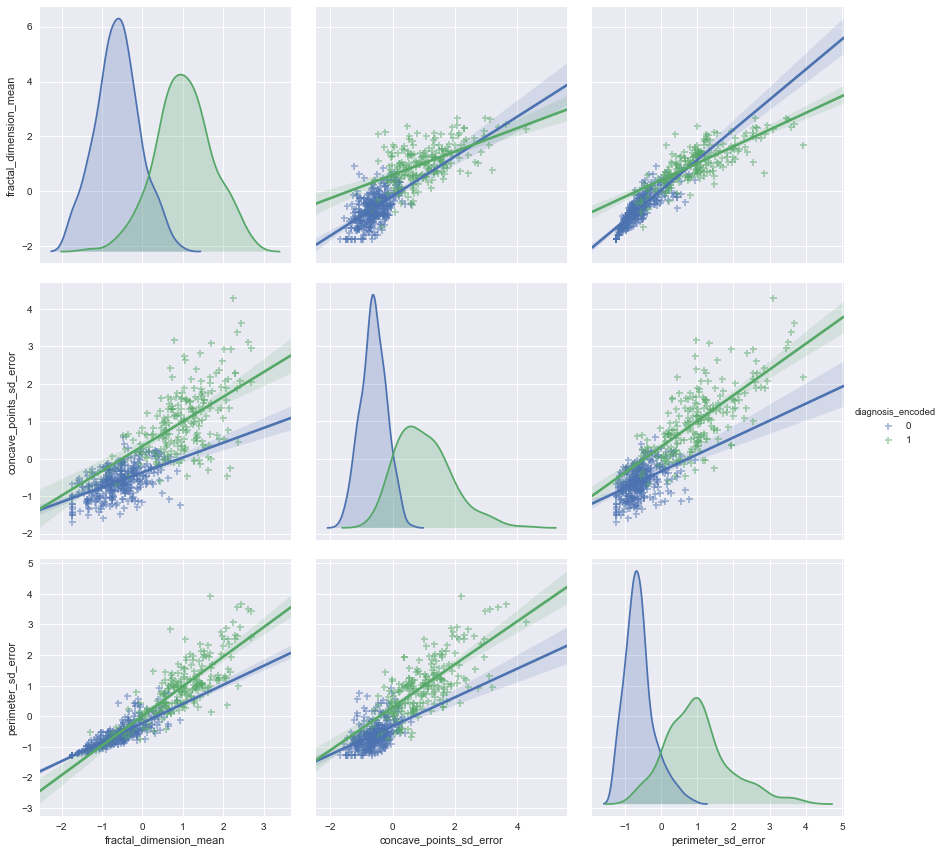

In [46]:
## Pairplots
sns.pairplot(df_c_df, vars=['fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error'], 
             hue='diagnosis_encoded',
             diag_kind = 'kde',
             diag_kws=dict(shade=True),
             markers="+",
             plot_kws = {'scatter_kws': {'alpha': 0.5}},
             kind="reg",
             size=4)


As expected, benign and malignant clusters are indeed pretty much separated for those features!

# Modeling

## Build a model to predict the malignant tumors

In [48]:
# Split data into input (X) and output (Y)
X = df_c_df.loc[:, df_c_df.columns != 'diagnosis_encoded']
Y = df_c_df['diagnosis_encoded']

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.25, 
                                                    stratify=Y, # to keep the ratios between B/M cancer
                                                    random_state=0)

In [ ]:
##-------------------##
## DON'T RUN THIS!!! ##
##-------------------##

# Feature Scaling (this is how it should theoretically be done) #
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
# Scale test-set using scaler fitted on train-set... since we have no idea about the test-data...
X_test = sc.transform(X_test)

### Use at least two classification techniques; compare and contrast the advantages and disadvantages of each
For this task we are going to use Decision Tree Classifier (DTC) and Support Vector Classifier (SVC).

### Evaluate the performance of each model

In [63]:
# Decision Tree
DTclassifier = DecisionTreeClassifier(criterion = 'entropy',
                                      random_state = 0
                                     )
## PROS
    ## No need to standardise the data
    ## Deals with categorical data (in case we'd want/need to add them)
    ## Easy(er) to interpret
    ## Capture non-linear dependances
    ## Computationally cheap
    ## Easy to build ensemble models on top of the simple DT to enhance its predictive power
## CONS
    ## Prone to overfit
    ## Unstable to small changes in the input data
    ## Global optimal solution not guaranteed
    ## Complexity increses quickly with the size of the tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [94]:
mdepths = np.linspace(1, 10, 10)
DTtrain_errors = list()
DTtest_errors = list()
for mdepth in mdepths:
    DTclassifier.set_params(max_depth=mdepth)
    DTclassifier.fit(X_train, Y_train)

    DTtrain_predict = DTclassifier.predict(X_train)
    Y_predDT = DTclassifier.predict(X_test)

    cmDT_train = confusion_matrix(Y_train, DTtrain_predict)
    cmDT = confusion_matrix(Y_test, Y_predDT)
    
    DTtrain_errors.append(cmDT_train.trace()/cmDT_train.sum())
    DTtest_errors.append(cmDT.trace()/cmDT.sum())
    
i_dm_optim = np.argmax(DTtest_errors)
dm_optim = mdepths[i_dm_optim]
print("Optimal max depth parameter : %s" % dm_optim)

Optimal max depth parameter : 3.0


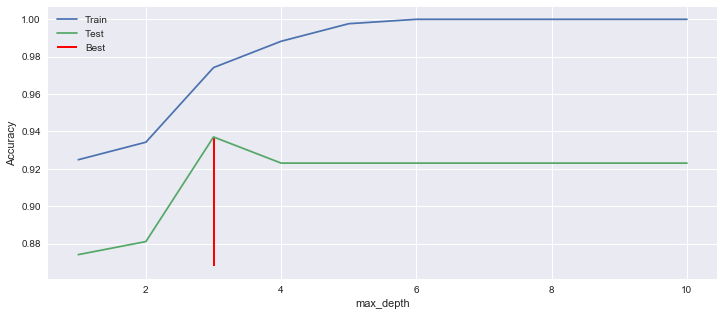

In [98]:
plt.figure(figsize=(12,5))
plt.plot(mdepths, DTtrain_errors, label='Train')
plt.plot(mdepths, DTtest_errors, label='Test')
plt.vlines(dm_optim, plt.ylim()[0], np.max(DTtest_errors), 'r',
           linewidth=2, label='Best')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

In [50]:
# Support Vector Classifier with Linear kernel
SVCclassifier = SVC(kernel = 'linear', 
                    random_state = 0
                   )
## PROS
    ## Easy to implement
    ## Accuracy in high-dimensional spaces (kernel trick)
    ## Solution guaranteed to be the global optimal one and not local (convex optimization)
    ## Outliers do not have a strong impact on SVC performance and predictions
## CONS
    ## Doesn't provide probability estimates
    ## Prone to overfit
    ## Tricky to select the right kernel
    ## Not computationally efficient
    ## Sensitive to noisy data

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
cc = np.linspace(1, 10, 10)
SVCtrain_errors = list()
SVCtest_errors = list()
for c in cc:
    SVCclassifier.set_params(C=c)
    SVCclassifier.fit(X_train, Y_train)

    SVCtrain_predict = SVCclassifier.predict(X_train)
    Y_predSVC = SVCclassifier.predict(X_test)

    cmSVC_train = confusion_matrix(Y_train, SVCtrain_predict)
    cmSVC = confusion_matrix(Y_test, Y_predSVC)
    
    SVCtrain_errors.append(cmSVC_train.trace()/cmSVC_train.sum())
    SVCtest_errors.append(cmSVC.trace()/cmSVC.sum())    
    
i_c_optim = np.argmax(SVCtest_errors)
c_optim = cc[i_c_optim]
print("Optimal c parameter : %s" % c_optim)

Optimal max depth parameter : 4.0


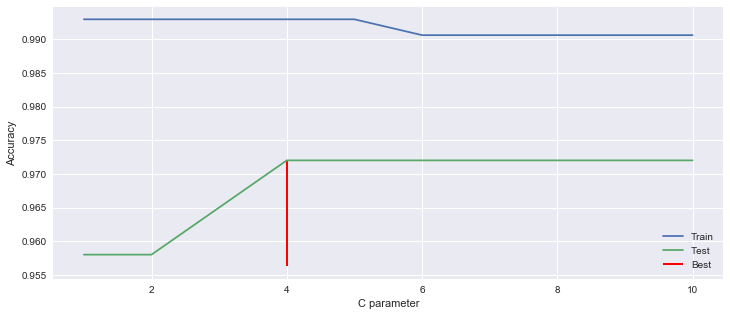

In [96]:
plt.figure(figsize=(12,5))
plt.plot(cc, SVCtrain_errors, label='Train')
plt.plot(cc, SVCtest_errors, label='Test')
plt.vlines(c_optim, plt.ylim()[0], np.max(SVCtest_errors), 'r',
           linewidth=2, label='Best')
plt.xlabel('C parameter')
plt.ylabel('Accuracy')
plt.legend()

### Identify how you would control for overfitting in each classification technique.

In [51]:
# Decision Tree is widely known for its overfitting qualities (lol)... that could be overcome by:
    ## Hyperparameter calibration
    ## Boosting
    ## Bagging
    ## Pruning
    ## Random Forest
    ## Extremely Randomized DT 
    ## Remove highly correlated features
    ## Decision trees can be unstable. Small variations 
        ## in the data might result in a completely different tree being generated.
    ## Maybe local minima was obtained instead of the global (fixed by training multiple trees)
    ## Or a combination of the above!!!
    
# Support Vector Classifier
    ## Hyperparameter calibration
    ## Regularization 
    ## Different Kernel functions
    ## Different SVC (eg. nuSVC or LinearSVC)
    ## Remove highly correlated features
    ## (Maybe) Add weights to individual samples in order to adapt their importance according to spefic rules
    ## Or a combination of the above!!!

### In each model, identify the most important predictive variables and explain how you identified them

#### Decison Tree
Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature. In Python this information is an attribute of the DTCclassifier object (feature_importances_).

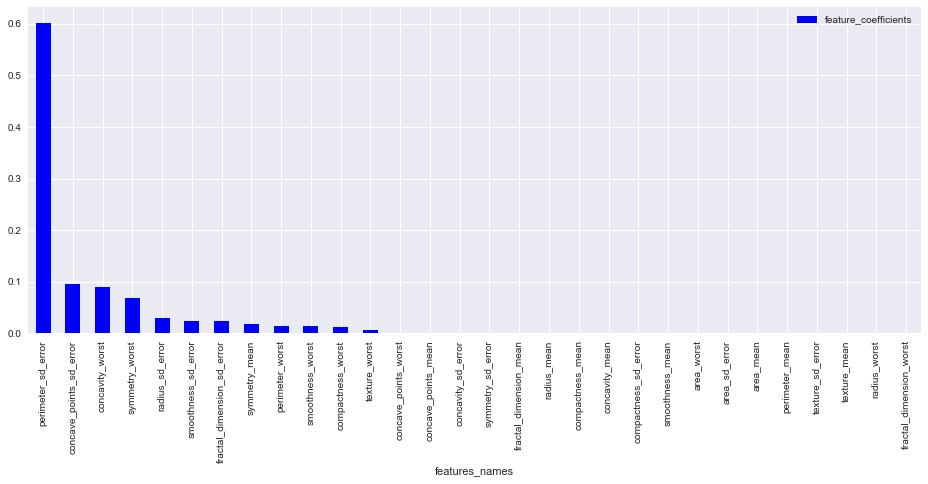

In [53]:
# Show feature importance for DTC
features_names = []
for col in X_train.columns:
    features_names.append(col)
    
DTCcoeffDF = pd.DataFrame(DTclassifier.feature_importances_)
DTCcoeffDF.rename(columns={0:'feature_coefficients'}, 
                 inplace=True)
DTCcoeffDF['features_names'] = features_names

DTCcoeffDF.sort_values(by='feature_coefficients', ascending=False, inplace=True)
DTCcoeffDF.plot(kind='bar',
                x='features_names',
                y='feature_coefficients',
                figsize=(16,6),
                color=[np.where(DTCcoeffDF['feature_coefficients']>0, 'b', 'g')])

#### SVC
In Python feature importance information are attributes of the SVCclassifier object (coef_). These weights figure the coordinates of the vector orthogonal to the hyperplane separating the classes, while their direction represents instead the predicted class.

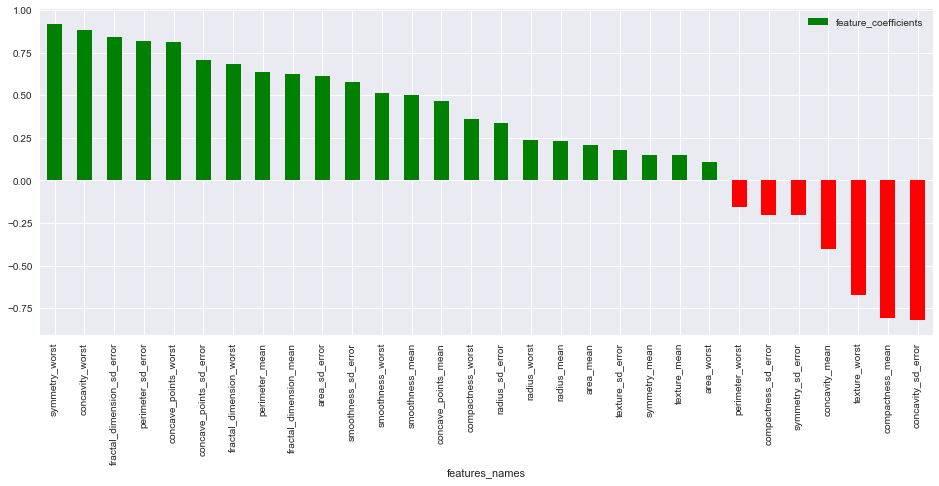

In [55]:
# Show feature importance for SVC    
SVCcoeffDF = pd.DataFrame(SVCclassifier.coef_)
SVCcoeffDF = SVCcoeffDF.T
SVCcoeffDF.rename(columns={0:'feature_coefficients'}, 
                 inplace=True)
SVCcoeffDF['features_names'] = features_names

SVCcoeffDF.sort_values(by='feature_coefficients', ascending=False, inplace=True)
SVCcoeffDF.plot(kind='bar',
                x='features_names',
                y='feature_coefficients',
                figsize=(16,6),
                color=[np.where(SVCcoeffDF['feature_coefficients']>0, 'g', 'r')])

# Explanation
## To Technical Audiences
### Explain the limitations of your analysis and identify possible further steps you could take

This project can be used as a starting point for a deeper and more detailed analysis. Time was actually the main obstacle I had to deal with. With more time I could have:

    1. deployed few feature selection methods and tested their impact on model performances.
    2. performed the analysis on different feature subsets.
    3. analysed model performances according to ROC Curve.
    4. computed confidence intervals on the performances via cross validation.
    5. done more accurate performance analysis. E.g. Selecting the best-suited model on the sensitivity value, because it is important to have a low number of false negatives (predicting bening when it is actually malignant)
    6. Explore semi-supervised approach -> e.g PCA (or KNN) + Classification
    7. Deployed ensemble models
    
Other observations on the pros&cons for each specific methods were made along the way.

    a. Scaling has been done on the full dataset and not only on the training set
    b. Pros&Cons of DTC and SVC and how their performances could be improved
     
Overall though, the implemented models performed pretty well, with an accuracy of

    .DTC: 97.42% (train set) 93.71% (test set)
    .SVC: 99.30% (train set) 97.20% (test set)
As shown by the an accuracy on the train set higher than the test one, both models showed sign of overfitting. Simply tuning one parameter per model (that are max_depth for DTC and C for SVC) we have decreased overfitting... So I am expecting performances to increase even more by tuning the remaining hyper-parameters.


## To Non-Technical Audiences
### Write a short summary of your analysis, explaining how your model works and how it performs.

With this research we are aiming to predict whether a tumor cell is malignant (M) or benign (B). The diagnosis is the dependent variable (the target), while the remaining (30) features are considered to be possible explanatory variables. Target variable is categorical so this problem can be considered as a classification problem. 

At first, data showed no missing values, few outliers, and to be slightly unbalanced... Overall data was pretty clean and ready to be analysed.

Correlation matrix and density estimates were used at first to determine which features had most predictive power: 

    1. fractal_dimension_mean
    2. concave_points_sd_error
    3. perimeter_sd_error
    
Conclusion confirmed by the clean clusters shown in the pairplots.

At a later stage two supervised methods have been deployed for our classification task:

    a. Decision Tree Classifier (DTC): hierarchical tree structure. Each level of the tree correspond to a feature and a split. The selected feature at each step is the one giving the most homogeneous split
    b. Support Vector Classifier (SVC): we trying to find the hyperplane maximising the separation between the different classes
    
Both methods performed pretty well (SVC showing better generalisation power and overperforming DTC especially on the test set) even with not much hyperparameters tuning (only max_depth and C where tuned for DTC and SVC respectively). Given the nature of the problem, accuracy has been used as a performance measure in order to penalise misclassified point.



### Briefly explain the factors that contributed to malignant vs benign tumor identification

We determined the most important features for tumor classification in few different ways:

    1. Correlation: computed correlation matrix of the feature matrix and selected the features correlating the most with the diagnosis variable.
    2. Density estimates: calculated the overlapping area (S) below the estimated kernel densities for each and every feature. A small S means bening and malignant cluster are well defined and separated accordingly to the selected feature, resulting to be more useful to predict the diagnosis.
    3. Decision Tree Classifier: feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature. 
    4. Support Vector Classifier: These weights figure the coordinates of the vector orthogonal to the hyperplane separating the classes, while their direction represents instead the predicted class